In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

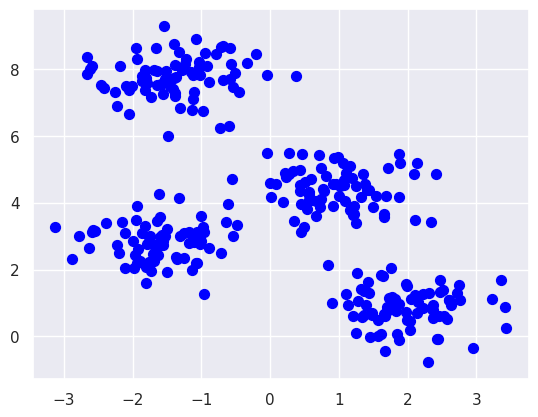

In [6]:
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50,color='blue');

import k-means from sklearn and fit the data

In [7]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

visual the fitted data by color the blobs by assigned label numbers

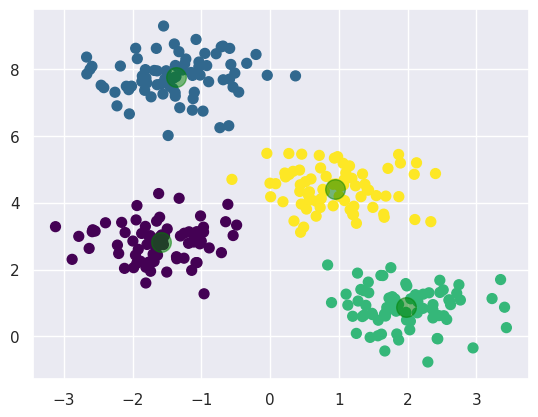

In [8]:
plt.scatter(X[:,0], X[:,1],c=y_kmeans,s=50,cmap='viridis')
center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='green',s=200,alpha=0.5)

Code to Implement K-Means from Scratch

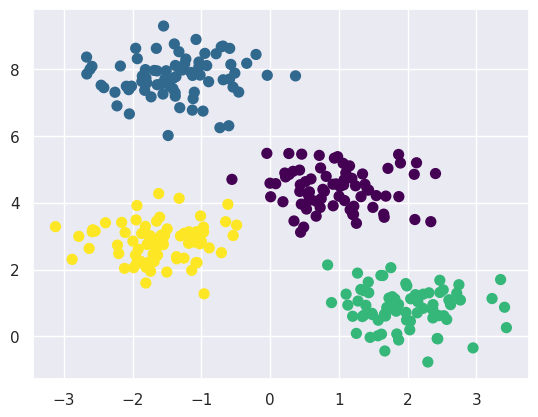

In [9]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
# 1. Randomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  while True:
  # 2a. Assign labels based on closest center
    labels = pairwise_distances_argmin(X, centers)
  # 2b. Find new centers from means of points
    new_centers = np.array([X[labels == i].mean(0)
    for i in range(n_clusters)])
  # 2c. Check for convergence
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');

bad optimization of sub optimal clustering

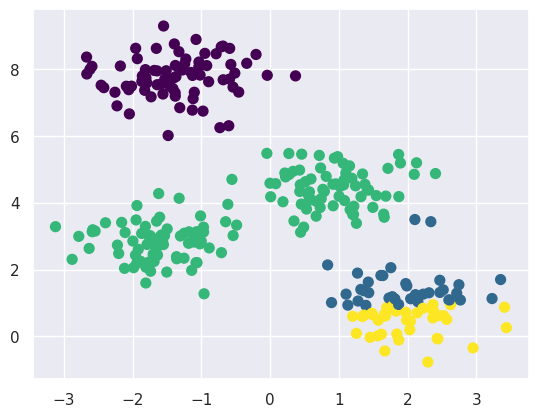

In [10]:
centers,labels=find_clusters(X,4,rseed=0)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

k-mean algorit
m

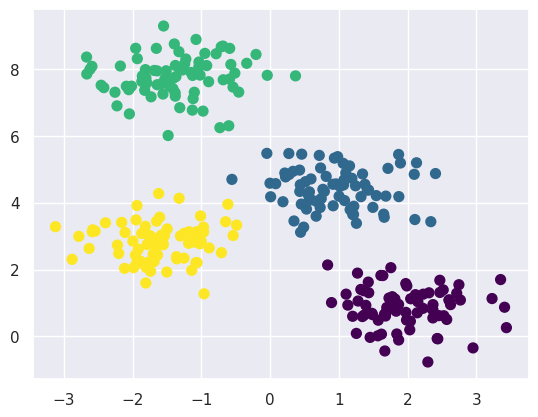

In [11]:
labels=KMeans(4,random_state=0,n_init=10).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis');

limitation of kmeans algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


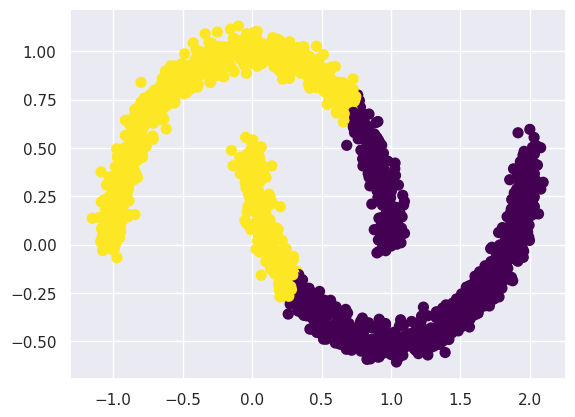

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(2000, noise=0.05, random_state=0)#200 0.05
labels = KMeans(2,random_state=0).fit_predict(X)#2
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Kernel Transformation Trick

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


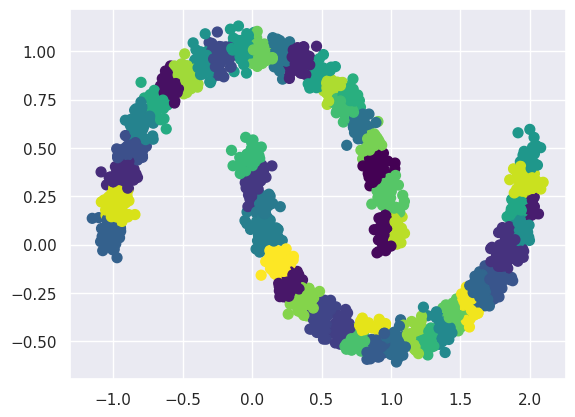

In [13]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=50, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

In [14]:
kmeans=KMeans(n_clusters=4,random_state=0,n_init=10)
kmeans

KMeans(n_clusters=4, n_init=10, random_state=0)